In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load DATASET**

In [59]:
#To display max. columns

pd.set_option('display.max_columns', None)

In [60]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [62]:
#Load the Dataset.

df = pd.read_csv('/content/Gurgaon_RealEstate.csv')

**Initial Data Exploration**

In [63]:
#Check for missing values

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


In [64]:
#Check for duplicate rows

duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 126


In [65]:
#Remove all duplicate rows

df = df.drop_duplicates()

In [66]:
#Check for missing values after removing duplicates

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1045
agePossession             0
super_built_up_area    1802
built_up_area          1987
carpet_area            1805
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


In [67]:
#Print shape

print(df.shape)

(3677, 23)


In [68]:
#Checking 1 missing value in society column

df[df["society"].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [69]:
#Dropping the row of missing society

df.drop(index=[2354],inplace=True)

In [70]:
#Check for missing values

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1045
agePossession             0
super_built_up_area    1802
built_up_area          1986
carpet_area            1805
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


In [71]:
#Impute missing values of price column for flats if more than 1 flat exist in a society use mean of society else use sector median

df['price'] = df.groupby('society')['price'].transform(lambda x: x.fillna(x.mean()))
df['price'] = df.groupby('sector')['price'].transform(lambda x: x.fillna(x.median()))

In [72]:
#Check for missing values

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1045
agePossession             0
super_built_up_area    1802
built_up_area          1986
carpet_area            1805
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


In [73]:
#Impute missing values of price_per_sqft column for flats if more than 1 flat exist ina society use mean of society else use sector median

df['price_per_sqft'] = df.groupby('society')['price_per_sqft'].transform(lambda x: x.fillna(x.mean()))
df['price_per_sqft'] = df.groupby('sector')['price_per_sqft'].transform(lambda x: x.fillna(x.median()))

In [74]:
#Check for missing values

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1045
agePossession             0
super_built_up_area    1802
built_up_area          1986
carpet_area            1805
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


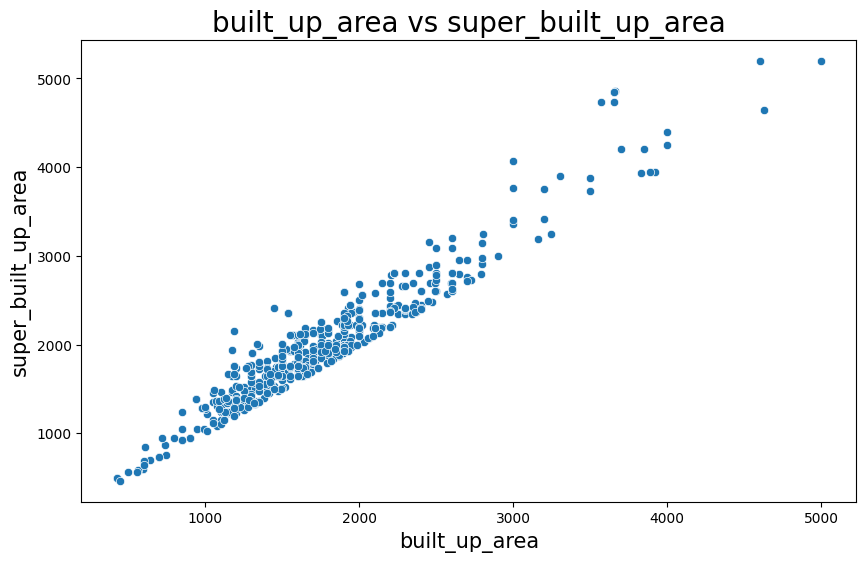

In [75]:
#Scatter plot between built_up_area & super_built_up_area
plt.figure(figsize = (10,6))
sns.scatterplot(data = df ,x = 'built_up_area',y = 'super_built_up_area')

#Adding labels and title
plt.ylabel('super_built_up_area', fontsize=15)
plt.xlabel('built_up_area', fontsize=15)
plt.title('built_up_area vs super_built_up_area', fontsize=20)
plt.show()

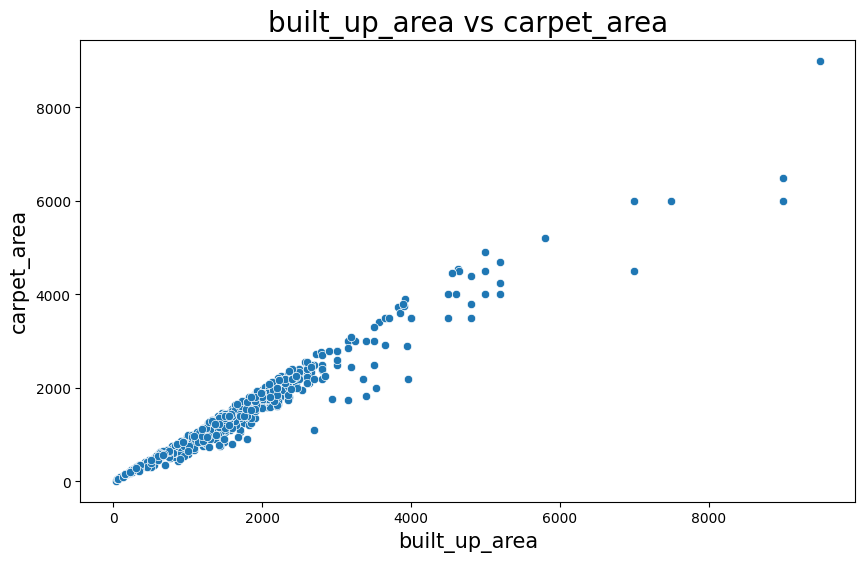

In [76]:
#Scatter plot between built_up_area & carpet_area
plt.figure(figsize = (10,6))
sns.scatterplot(data = df ,x = 'built_up_area',y = 'carpet_area')

#Adding labels and title
plt.ylabel('carpet_area', fontsize=15)
plt.xlabel('built_up_area', fontsize=15)
plt.title('built_up_area vs carpet_area', fontsize=20)
plt.show()

In [77]:
#Checking if all 3 values(built up, super built up and carpet areas) are missing

((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

0

In [78]:
#Storing all 3 values(built up, super built up and carpet areas) present in all_present_df

all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [79]:
#all_present_df Shape

all_present_df.shape

(531, 23)

In [80]:
#Calculating the super TO builtup ratio and  carpet TO builtup ratio

super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

print(super_to_built_up_ratio)
print(carpet_to_built_up_ratio)

1.105263157894737
0.9


In [81]:
#1)Storing super_built_up_area & carpet_area is present , built_up_area is null to sbc_df

sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [82]:
sbc_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159


In [83]:
#Filling these values by using the ratio values of super_built_up_area & carpet_area

sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-83-4e16ad40dadb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [84]:
#Updating it to the dataframe

df.update(sbc_df)

In [88]:
#2)Storing super_built_up_area is present , but built_up_area & carpet_area is null in sb_df

sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [86]:
sb_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
6,flat,paras quartier,gwal pahari,7.5,14018.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0,1,0,1,1,1,49
7,flat,experion the heartsong,sector 108,2.0,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0,1,0,0,0,0,95


In [87]:
#Filling the values by using the ratio value of super_built_up_area

sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-87-1da7cd32784e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [ ]:
#Updating to dataframe

df.update(sb_df)

In [ ]:
#3)Storing carpet_area is present , but built_up_area & super_built_up_area is null in c_df

c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [ ]:
c_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15


In [ ]:
#Filling the values by using the ratio value of carpet_area

c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-33-febe469aedd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [ ]:
#Updating to dataframe

df.update(c_df)

In [89]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1045
agePossession             0
super_built_up_area    1802
built_up_area          1566
carpet_area            1805
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [90]:
#Creating a dataframe for the anamoly records

anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [91]:
anamoly_df.sample(5)

,price,area,built_up_area
1731,3.50,1449.0,1449.0
1677,5.75,1935.0,1935.0
2524,2.80,1800.0,1900.0
1396,8.25,1800.0,1800.0
388,2.95,1458.0,162.0


In [92]:
#Replacing the area column values into the built_up_area column for anamolies

anamoly_df['built_up_area'] = anamoly_df['area']

In [93]:
#Updating it to the main dataframe

df.update(anamoly_df)

In [94]:
#Now dropping the unwanted columns

df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [95]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,3,2,2,2.0,NaN,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,2,2,2,4.0,NaN,New Property,NaN,1,1,0,0,0,0,38


In [96]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             19
facing             1045
agePossession         0
built_up_area      1566
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [97]:
#Finding rows in which floorNum is NULL

df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
521,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
800,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
975,house,uppal southend,sector 49,6.75,290948.0,12,12,3+,NaN,West,Moderately Old,232.0,1,1,0,1,1,1,49
1348,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1528,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1541,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
2058,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
2166,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
2281,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
2305,house,independent,sector 46,6.81,36911.0,12,14,3+,NaN,East,New Property,1845.0,0,1,0,0,1,1,40


In [98]:
#As most of them are house ,so replacing the nan values with the ,median value

df[df['property_type'] == 'house']['floorNum'].median()

3.0

In [99]:
df['floorNum'].fillna(3.0,inplace=True)

In [100]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1045
agePossession         0
built_up_area      1566
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

<Axes: ylabel='count'>

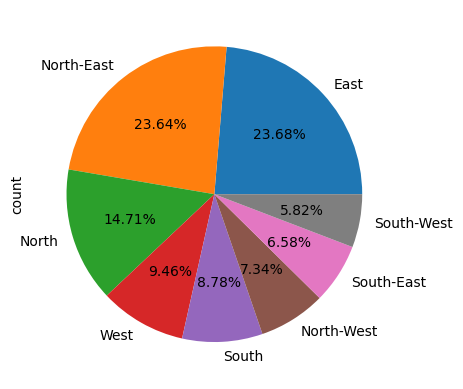

In [101]:
#Piechart of facing column

df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [102]:
#Removing facing column

df.drop(columns=["facing"],inplace=True)

In [ ]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [103]:
#Removing price_bin column

df.drop(columns=["price_bin"],inplace=True)

KeyError: "['price_bin'] not found in axis"

In [104]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
agePossession         0
built_up_area      1566
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [105]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,2,2,2,4.0,New Property,NaN,1,1,0,0,0,0,38


In [ ]:
#Exporting the missing value imputed data to CSV

df.to_csv('gurgaonrealestate_missingvalue_updated.csv',index=False)